In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

## Players in the NHL

In [2]:
df_players = pd.read_csv('data/nhl/nhl_salaries/train.csv')

In [3]:
df_players.columns.shape

(154,)

In [4]:
pd.options.display.max_columns=52

In [5]:
df_players[df_players.columns[:52]].head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9


In [6]:
df_players[df_players.columns[52:102]].head()

,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd
0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2
2,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19
3,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0
4,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7


In [7]:
df_players[df_players.columns[102:]].head()

,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [8]:
df_players.shape

(612, 154)

## Let's make some interesting insights

In [9]:
df_players.Team.value_counts().reset_index()

,index,Team
0,NSH,25
1,N.J,24
2,BOS,23
3,VAN,23
4,BUF,23
...,...,...
63,PIT/TOR,1
64,FLA/TOR,1
65,EDM/NYR,1
66,OTT/VAN,1


^^ not really interesting

In [10]:
df_players.Position.value_counts()

D          203
C           96
RW          64
LW          52
C/LW        46
LW/C        34
C/RW        31
LW/RW       26
RW/LW       18
RW/C        15
LW/C/RW      6
C/RW/LW      5
C/LW/RW      5
RW/C/LW      4
RW/LW/C      3
LW/RW/C      2
D/LW         1
C/D          1
Name: Position, dtype: int64

^^ this is interesting. There are apparently 2 players who are able to play in the Defence AND as centre/wing. What do the get???

In [11]:
df_players[df_players.Position.isin(['C/D', 'D/LW'])]

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,...,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
332,792500,89-07-27,Ivry-sur-Seine,NaN,FRA,FRA,71,191,NaN,NaN,NaN,L,Auvitu,Yohann,D/LW,N.J,25,2,2,1,1,4,1,0.1,2,505,...,43.0,13.0,10.0,6.0,9.0,10.0,16.0,16,25,177.0,146.0,130.0,169.0,58.0,40.0,26.0,23.0,0.2,1.1,1.3,958.64,31,27.0,101.7,7.9,0.31
577,925000,97-01-30,Boston,MA,USA,USA,72,183,2015.0,1.0,21.0,R,White,Colin,C/D,OTT,2,0,0,0,0,0,0,-0.3,0,34,...,4.0,1.0,0.0,0.0,2.0,0.0,1.0,0,3,8.0,15.0,8.0,5.0,1.0,2.0,0.0,2.0,-0.1,0.0,0.0,85.45,1,0.0,105.0,0.1,0.03


^^ ok, not really a lot. Bwt. what is a lot. What is the distribution on salaries?

In [12]:
df_player_salaries = df_players.Salary.value_counts().reset_index().rename(columns={'Salary':'cnt', 'index':'salary'})
df_player_salaries

,salary,cnt
0,925000,80
1,575000,39
2,600000,29
3,4000000,20
4,5000000,19
...,...,...
133,11000000,1
134,3550000,1
135,10900000,1
136,3575000,1


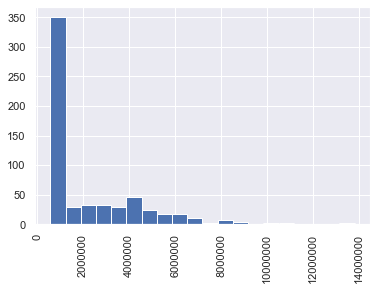

In [13]:
plt.hist(x=df_players.Salary, bins=20);
plt.xscale('linear')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 0));
plt.xticks(rotation=90);

^^ looks like around 1 Million or less is the most common salary in the NHL. But the are of course stars:

In [14]:
df_players.sort_values(by='Salary', ascending=False)[['First Name', 'Last Name', 'Team', 'Salary']][:10]

,First Name,Last Name,Team,Salary
103,Patrick,Kane,CHI,13800000
496,Jonathan,Toews,CHI,13800000
542,Shea,Weber,MTL,12000000
208,P.K.,Subban,NSH,11000000
145,Sidney,Crosby,PIT,10900000
226,Jakub,Voracek,PHI,10000000
260,Alex,Ovechkin,WSH,10000000
594,Evgeni,Malkin,PIT,9500000
608,Ryan,Suter,MIN,9000000
191,Zach,Parise,MIN,9000000


## Where are these great hockey players coming from?

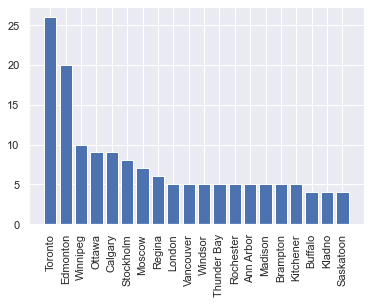

In [15]:
# What are the cities the most number of players is coming from:

df_city_cnt = df_players.City.value_counts()[:20].reset_index().rename(columns={'City':'cnt', 'index':'city'})

plt.bar(df_city_cnt.city, df_city_cnt.cnt);
plt.xticks(rotation=90);

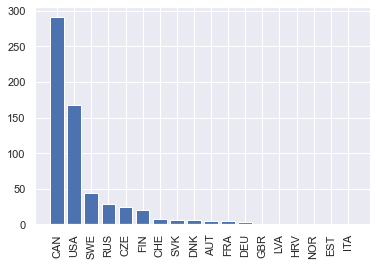

In [16]:
# What are the countries the most number of players is coming from:

df_country_cnt = df_players.Cntry.value_counts()[:20].reset_index().rename(columns={'Cntry':'cnt', 'index':'country'})

plt.bar(df_country_cnt.country, df_country_cnt.cnt);
plt.xticks(rotation=90);

### Let's get GPS coordinates and visualize it on the map

In order to do that, I've downloaded another datasets with world cities and their GPS coords.

In [17]:
# Downloaded next dataset with cities and GPS from https://simplemaps.com/data/world-cities
df_cities = pd.read_csv('data/cities/worldcities.csv')
df_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [18]:
# merge players and lat/lng coordinates
df_players_with_cities = df_players.merge(df_cities[['city_ascii', 'iso3', 'lat', 'lng']], how='left', left_on=['City', 'Cntry'], right_on=['city_ascii', 'iso3'])
df_players_with_cities.shape

(810, 158)

In [19]:
# apparently duplicates in city+iso3. let's see 5 top most duplicated cities
df_gps = df_cities[['city_ascii', 'iso3', 'lat', 'lng']]
df_gps.groupby(['city_ascii', 'iso3']).size().reset_index().sort_values(0, ascending=False)[:5]

,city_ascii,iso3,0
11381,Franklin,USA,16
36755,Washington,USA,16
32356,Springfield,USA,16
7615,Clinton,USA,14
15256,Jackson,USA,13


In [20]:
# Why are the cities duplicated? Are those real duplicated or just messy data?
df_cities[(df_cities.city_ascii=='Jackson') & (df_cities.iso3=='USA')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1952,Jackson,Jackson,32.3163,-90.2124,United States,US,USA,Mississippi,admin,325350.0,1840014895
10654,Jackson,Jackson,42.2431,-84.4037,United States,US,USA,Michigan,NaN,87110.0,1840003173
11185,Jackson,Jackson,35.6535,-88.8353,United States,US,USA,Tennessee,NaN,74065.0,1840014528
12265,Jackson,Jackson,40.0980,-74.3579,United States,US,USA,New Jersey,NaN,56968.0,1840081610
23584,Jackson,Jackson,37.3792,-89.6521,United States,US,USA,Missouri,NaN,14836.0,1840008735
25723,Jackson,Jackson,43.4721,-110.7745,United States,US,USA,Wyoming,NaN,12576.0,1840021258
27077,Jackson,Jackson,39.0460,-82.6492,United States,US,USA,Ohio,NaN,11462.0,1840008548
30871,Jackson,Jackson,40.3774,-76.3142,United States,US,USA,Pennsylvania,NaN,8853.0,1840143432
32368,Jackson,Jackson,39.9057,-76.8796,United States,US,USA,Pennsylvania,NaN,8081.0,1840151964
33450,Jackson,Jackson,38.3485,-120.7728,United States,US,USA,California,NaN,7550.0,1840018852


In [21]:
# OK, there are apparently many names of the same name in the same country. No chance to assign all player to a city exactly 
# based on the city name and country only. 
# I don't want to randomly pick any of this cities and assign it to the player. A better way is to accept multiple assignments 
# and to plot anyway. 
# The rule is: If we don't know which e.g. 'Jackson' exactly is the player from, we simply plot all of them. 
#              There is no harm in the visual perception and it still provides very good overview on the map.

In [22]:
df_players_with_cities[['lat', 'lng']].isna().sum()

lat    117
lng    117
dtype: int64

In [23]:
# drop 117 players with no city found for now
df_players_with_cities.dropna(subset=['lat', 'lng'], inplace=True)

In [24]:
coords=df_players_with_cities[['lat', 'lng']].values.tolist()
names=df_players_with_cities[['First Name', 'Last Name', 'City']].values.tolist()

loc_map = folium.Map(location=[df_cities['lat'].median(), df_cities['lng'].median()], zoom_start=2, tiles='cartodbpositron', width=640, height=480)
[folium.CircleMarker(coords[i], radius=0.0001, color='#800000', tooltip=f'{names[i][0]} {names[i][1]}, {names[i][2]}').add_to(loc_map) for i in range(len(coords))]
loc_map

# Go with the mouse over the markers to see names of the players